<a href="https://colab.research.google.com/github/j23-cs167/notebook-5-Venamax21/blob/main/Notebook5_vena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook \#5: SVM, Perceptron, SGD, and PCA
**Due:** Tuesday 11/9, by 11:59pm

Name:

**Exercises**: \\
Build a **default model** for each of the following and then build a model with **one parameter tuned** (no need to include a graph, just change one parameter that hopefully results in a better model):
1. Support Vector Machines
2. Perceptron
3. Stochastic Gradient Descent
4. Run a PCA on the best model
5. Answer the conclusion questions


In [1]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
data= pd.read_csv('/content/drive/MyDrive/ColabNotebooks/CS167Datasets/breast-cancer-wisconsin-data.csv')
data.head()

Mounted at /content/drive


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#we need to drop the last column 'Unnamed: 32'
data.drop(labels='Unnamed: 32', axis=1, inplace=True)
data.head()

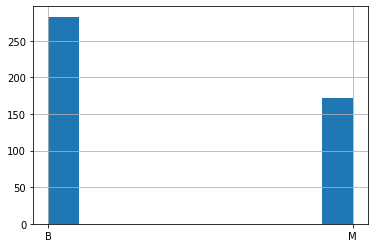

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

from google.colab import drive
import pandas as pd
import numpy
from sklearn import metrics
import matplotlib.pyplot as plt
from itertools import product

predictors = data.columns.drop('diagnosis')
target = "diagnosis"

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)

#Normalize Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)
train_sln.hist()
#now you can use train_data, test_data, train_sln, and test_sln

## Exercises:
1. Support Vector Classifier: \\
  a. Default \\
  b. Tuned

In [4]:
#Default SVC:
clf = SVC()
clf.fit(train_data,train_sln)
predictions = clf.predict(test_data)

#output accuracy
print("accuracy:", metrics.accuracy_score(test_sln, predictions))


accuracy: 0.9824561403508771


In [5]:
#Tuned SVC:
clf = SVC(class_weight = 'balanced')
clf.fit(train_data,train_sln)
predictions = clf.predict(test_data)

#output accuracy
print("Tuned accuracy:", metrics.accuracy_score(test_sln, predictions))


Tuned accuracy: 0.9912280701754386


2. Perceptron: \\
  a. Default \\
  b. Tuned

In [6]:
#Default Perceptron
from sklearn.linear_model import Perceptron

#establish training and testing sets
train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
#load up scikit-learn Perceptron
perc = Perceptron()
perc.fit(train_data,train_sln)
perc_predictions = perc.predict(test_data)

#output accuracy
print("accuracy:", metrics.accuracy_score(test_sln, perc_predictions))

accuracy: 0.6491228070175439


In [7]:
#Tuned Perceptron

#load up scikit-learn Perceptron
perc = Perceptron(fit_intercept=False)
perc.fit(train_data,train_sln)
perc_predictions = perc.predict(test_data)

#output accuracy
print("Tuned accuracy:", metrics.accuracy_score(test_sln, perc_predictions))

Tuned accuracy: 0.6491228070175439


The accuracy stays the same or worse after using all of the parameters.

3. Stochastic Gradient Descent: \\
  a. Default \\
  b. Tuned

In [8]:
import pandas
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier


In [9]:
#Default SGD
sgd = SGDClassifier()
sgd.fit(train_data,train_sln)
sgd_predictions = sgd.predict(test_data)

#output accuracy
print("accuracy:", metrics.accuracy_score(test_sln, sgd_predictions))


accuracy: 0.3508771929824561


In [10]:
#Tuned SGD
sgd = SGDClassifier(alpha = 0.002)
sgd.fit(train_data,train_sln)
sgd_predictions = sgd.predict(test_data)

#output accuracy
print("Tuned accuracy:", metrics.accuracy_score(test_sln, sgd_predictions))

Tuned accuracy: 0.6491228070175439


3. Now take the model that performed the best above and run a **principal component analysis** on it. 

In [19]:
from google.colab import drive
import pandas
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [28]:
#PCA on best model
train_data, test_data, train_sln, test_sln = \
    train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)

#When fitting with PCA, you do not use the target column - this is an unsupervised learning algorithm
extractor = PCA(n_components=10, whiten=True)
extractor.fit(train_data)
#These are transformed data (train and test)
train_transformed = extractor.transform(train_data)
test_transformed = extractor.transform(test_data)
#Now Tuned SVC is my best model so I gonna use it to run PCA
#Tuned SVC:
clf = SVC(class_weight = 'balanced')
clf.fit(train_transformed,train_sln)
predictions = clf.predict(test_transformed)

#output accuracy
print("PCA SVC tuned accuracy:", metrics.accuracy_score(predictions, test_sln))

PCA SVC tuned accuracy: 0.9736842105263158


## Conclusions:
a. Which model performed the best? Why do you think this model performed the best? \\
b. What effect did the principal component analysis have on the accuracy of your best model? Why do you think this is the case?

My tuned Support Vector Classifier (SVC) performed the best with an accuracy score of 0.99 while the default SVC was 0.98. It performed the best because it offers the best fit hyperplane that divides the data and effectie in high dimensional space.

Principal component analysis (pca) did not improve my model performance but instead made it slightly worse, resulting in 0.97 accuracy score. This is because PCA does not consider the target variable into account.